In [6]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import platform
from konlpy.tag import Okt
from collections import Counter
import platform
# from selenium import webdriver
# from selenium.webdriver.common.by import By

## 데이터 산업 시장 규모, 데이터 직무 인력 현황

In [10]:
platform.system()

'Windows'

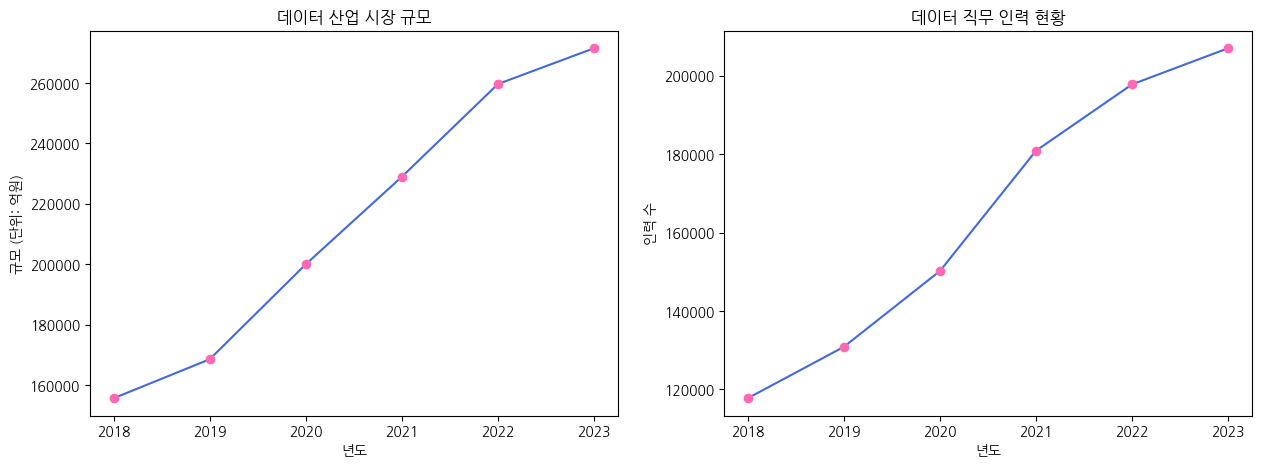

In [16]:
data_industry_scale = [155684, 168582, 200024, 228986, 259663, 271513]
data_person = [117727, 130833, 150177, 180873, 197802, 207027]
year = [2018, 2019, 2020, 2021, 2022, 2023]

fig, axs = plt.subplots(1, 2, figsize = (15, 5))

if platform.system() == 'Windows':
    import koreanize_matplotlib
else:
    plt.rcParams['font.family'] = 'AppleGothic'

title_list = ['데이터 산업 시장 규모', '데이터 직무 인력 현황']
ylabel_list = ['규모 (단위: 억원)', '인력 수']
data_list = [data_industry_scale, data_person]

for i in range(2):
    axs[i].plot(year, data_list[i], marker = 'o',
                mec = 'hotpink', mfc = 'hotpink', color = 'royalblue')
    axs[i].set_title(title_list[i])
    axs[i].set_xlabel('년도')
    axs[i].set_ylabel(ylabel_list[i])

plt.show()

https://kdata.or.kr/kr/board/info_01/boardView.do?pageIndex=1&bbsIdx=34009&searchCondition=all&searchKeyword=

> 2023년 기준 데이터산업 시장은 2022년 대비 4.6% 성장한 27조 1,513억원 규모

## 지역별 취업 공고 개수 비교

In [145]:
# job_posting_number_list = []
# for i in range(1, 17):
#     url = f'https://www.jobplanet.co.kr/companies?industry_id=700&city_id={i}'
#     headers = {
#         'User-Agent': 'Mozilla/5.0',
#         'Referer': 'https://www.google.com'
#     }

#     response = requests.get(url, headers=headers)

#     soup = BeautifulSoup(response.text, 'html.parser')

#     job_posting_number_list.append(soup.find('div', {'class' : 'result'}).find('span').string)

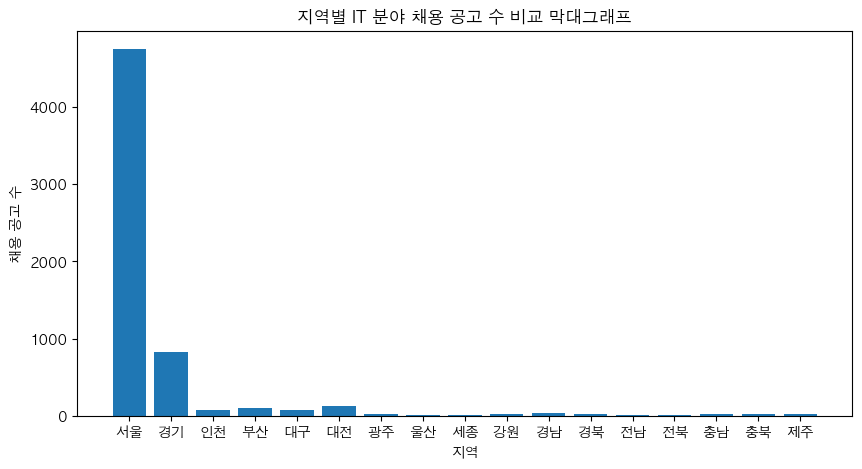

In [153]:
region_name = ['서울', '경기', '인천', '부산', '대구', '대전', '광주', '울산', '세종', '강원',
               '경남', '경북', '전남', '전북', '충남', '충북', '제주']
job_posting_number_list = [4750, 826, 71, 99, 74, 132, 25, 14, 12, 22, 29, 20, 10, 10, 23, 24, 18]

plt.figure(figsize= (10, 5))
plt.bar(region_name, job_posting_number_list)
plt.title('지역별 IT 분야 채용 공고 수 비교 막대그래프')
plt.xlabel('지역')
plt.ylabel('채용 공고 수')
plt.show()

> 서울이 압도적으로 채용 공고가 많다... 우리 모두 서울로 떠나야 하는가?

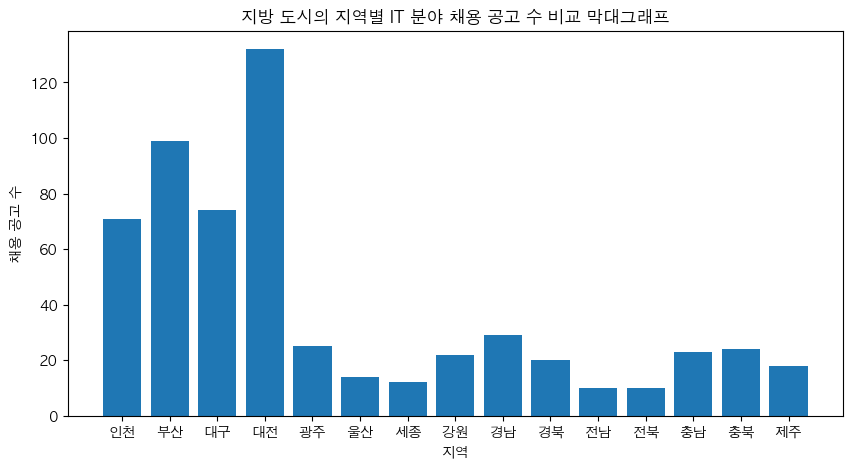

In [156]:
plt.figure(figsize= (10, 5))
plt.bar(region_name[2:], job_posting_number_list[2:])
plt.title('지방 도시의 지역별 IT 분야 채용 공고 수 비교 막대그래프')
plt.xlabel('지역')
plt.ylabel('채용 공고 수')
plt.show()

> 대전이나 부산으로 가는 것도 하나의 좋은 방법이라고 생각된다.

In [6]:
filename = 'html1.txt'
html1 = open(filename, 'r')

code_list = []

total_soup = BeautifulSoup(html1, 'html.parser')
ul = total_soup.find('ul', {'class' : 'List_List__Ni_dK'})

for i in ul.find_all('button'):
    code_list.append(i.attrs['data-position-id'])

len(code_list)

742

In [1]:
# preferred_list = []

# for i in range(len(code_list)):
#     url = 'https://www.wanted.co.kr/wd/' + code_list[i]
#     headers = {
#         'User-Agent': 'Mozilla/5.0',
#         'Referer': 'https://www.google.com'
#     }

#     response = requests.get(url, headers=headers)

#     soup = BeautifulSoup(response.text, 'html.parser')

#     text = soup.get_text()
#     start = text.find('"preferred_points":"')
#     end = text.find(',"benefits":"')
#     text1 = text[start:end].replace('\n', ' ')
#     text2 = text1.replace('\\n-', '')
#     text3 = text2.replace('\\\n•', '')
#     text4 = text3.replace('\\\n', '')
#     text5 = text4.replace('\\n•', '')
#     text6 = text5.replace('\\n', '')
    
#     preferred_list.append(text6[22:-1])

In [2]:
# file_name = 'word_cloud.txt'

# with open(file_name, 'w') as file:
#     file.write('\n'.join(preferred_list))

In [34]:
def show_word_cloud(word_list, stopword_list, number):
    text = open('word_cloud.txt', encoding='utf-8').read()
    okt = Okt() # Open Korean Text 객체 생성

    # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
    sentences_tag = []
    sentences_tag = okt.pos(text)

    noun_adj_list = []
    # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in word_list:
            noun_adj_list.append(word)

    print(noun_adj_list)
    # 가장 많이 나온 단어부터 50개를 저장한다.
    counts = Counter(noun_adj_list)
    tags = counts.most_common(number)
    print(tags)

    # 한글을 분석하기위해 font를 한글로 지정, macOS는 .otf, windows는 .ttf 파일의 위치를 지정
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        font = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    dict_tag = dict(tags)

    stopword = stopword_list

    for i in stopword:
        del dict_tag[i]

    img_mask = np.array(Image.open('cloud.png'))
    wc = WordCloud(font_path = path, width = 400, height = 400,
                    background_color='white', max_font_size=200,
                    repeat=True, colormap = 'inferno', mask = img_mask)

    cloud = wc.generate_from_frequencies(dict_tag)
    # 생성된 WordCloud를 test.jpg로 보낸다.
    # cloud.to_file('text.jpg')
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

## 우대사항 워드클라우드

['MLOps', '관련', '프로젝트', '경험', '있으신', '분', '대규모', '데이터', '처리', '경험', '있으신', '분', '온', '오프라인', '학습', '서비스', '사용자', '경험', '튜터', '학생', '무관', '이', '있으신', '분', '멀티', '달', 'AI', '모델', '관련', '프로젝트', '경험', '있으신', '분', '대규모', '데이터', '처리', '경험', '있으신', '분', '온', '오프라인', '학습', '서비스', '사용자', '경험', '튜터', '학생', '무관', '이', '있으신', '분', 'Python', 'C', 'C', '언어', '중', '숙련', '새로운', '기술', '거부', '감', '없으신', '분', 'CAN', 'Automotive', 'Ethernet', '등', '차량', '프로토콜', '차량', '도메인', '지식', '있으신', '분', 'Pytorch', 'Lightning', '라이브러리', '익숙하신', '분', 'Data', 'centric', '모델', 'optimization', '경혐', '있으신', '분', '클라우드', '기반', 'AWS', 'Kafka', 'Kubeflow', '의', '대규모', 'ML', '학습', '인퍼런스', '인프라', '세팅', '경험', '있으신', '분', 'Docker', '컨테이너', '기반', 'CI', 'CD', 'Kubernetes', '배포', '가능하신', '분', '협업', '좋아하시는', '분', '컴퓨터', '과학', '관련', '분야', '석사', '이상', '사용', '서비스', '개발', '및', '운영', '경험', 'Google', 'Map', 'Naver', 'Map', 'API', '사용', '경험', 'iOS', 'Android', '네이티', '브', '개발', '경험', 'Node', 'js', '및', 'Express', 'js', '같은', '백엔드', '기술', '대

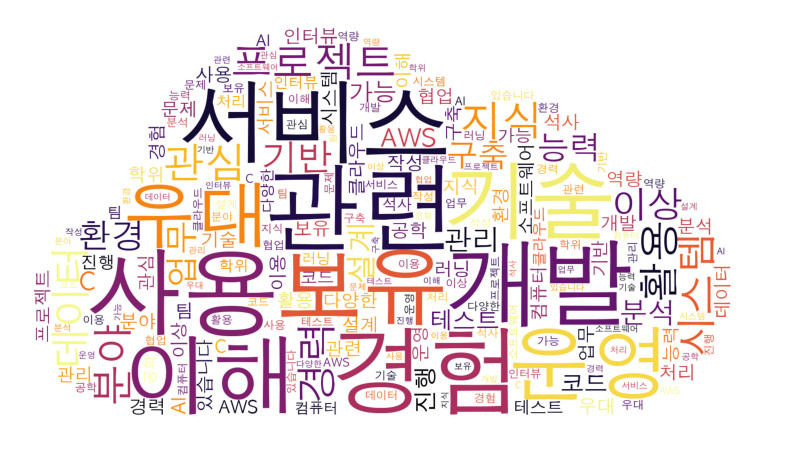

In [35]:
word_list = ['Noun', 'Adjective', 'Alpha']
stopword_list = ['분', '있으신', '및', '등', '대한', '있는', '를', '것', '수']

show_word_cloud(word_list, stopword_list, 60)

## 기술 스택 워드클라우드

['MLOps', 'AI', 'Python', 'C', 'C', 'CAN', 'Automotive', 'Ethernet', 'Pytorch', 'Lightning', 'Data', 'centric', 'optimization', 'AWS', 'Kafka', 'Kubeflow', 'ML', 'Docker', 'CI', 'CD', 'Kubernetes', 'Google', 'Map', 'Naver', 'Map', 'API', 'iOS', 'Android', 'Node', 'js', 'Express', 'js', 'UI', 'UX', 'AI', 'SCI', 'Kaggle', 'competition', 'AWS', 'GCP', 'LLM', 'Spark', 'Kaggle', 'Behavior', 'Tree', 'ROS', 'Data', 'Studio', 'Looker', 'Studio', 'Tableau', 'Looker', 'A', 'B', 'LLM', 'SCI', 'SCIE', 'LLM', 'On', 'Premise', 'NoSQL', 'Cassandra', 'MongoDB', 'Redis', 'AWS', 'Azure', 'GCP', 'Kafka', 'RabbitMQ', 'RESTful', 'API', 'Docker', 'Kubernetes', 'Triton', 'Inference', 'Server', 'SCI', 'SCIE', 'ML', 'SVM', 'Random', 'Forest', 'AI', 'TestCase', 'ISTQB', 'CSTS', 'FL', 'SW', 'Streaming', 'Linux', 'C', 'IDS', 'IPS', 'SSL', 'TLS', 'AWS', 'Azure', 'Agile', 'Goal', 'setting', 'Self', 'starter', 'route', 'table', 'traceroute', 'docker', 'network', 'firewall', 'IT', 'VLM', 'Vision', 'Language', 'Model'

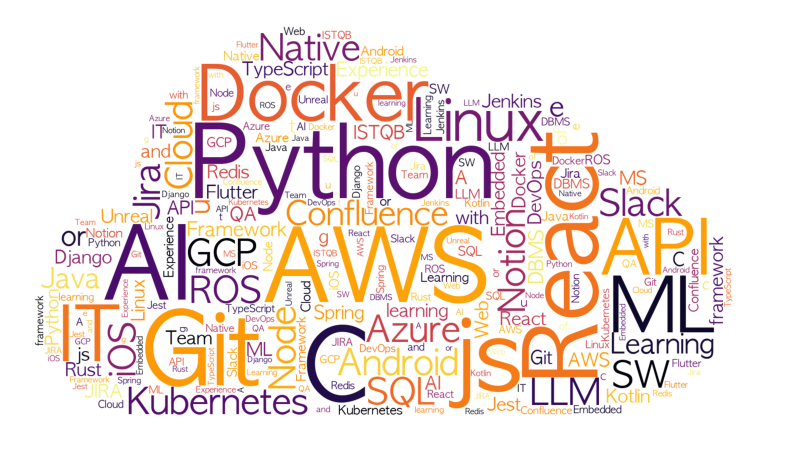

In [157]:
word_list = ['Alpha']
stopword_list = ['UX', 'UI', 'Test', 'CI', 'CD', 'in', 'D', 'Google']

show_word_cloud(word_list, stopword_list, 70)